In [108]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit

from LUT_functions import pixel_registration, create_LUT_df
import scipy


In [2]:
#choose filepath to desired data
path = 'C:\\Users\\khart\\Documents\\IRCSP2_data\\calibration_data\\LUT\\'
cal_file1 =  "C://Users//khart//Documents//IRCSP2_data//calibration_files//cam1pixel.h5"
cal_file2 =  "C://Users//khart//Documents//IRCSP2_data//calibration_files//cam1pixel.h5"

In [3]:
#will create a df and print the names of the keys in the original hdf5 file
df1 = create_LUT_df(path,'cam1_80.h5')
df2 = create_LUT_df(path,'cam2_80.h5')

In [4]:
waves= np.linspace(7,13,61)
temps = [25,30,35,40,45,50,55,60,70,75,80]

In [20]:
#apply pixel registration to full dataset

ymin1 = 105; ymax1 = 140;
ymin2 = 130; ymax2 = 165;

mean_ims1 =[]
mean_ims2 =[]
std_ims1  =[]
std_ims2  =[]

for i in temps:
    #will create a df and print the names of the keys in the original hdf5 file
    df1 = create_LUT_df(path,'cam1_'+str(i)+'.h5')
    df2 = create_LUT_df(path,'cam2_'+str(i)+'.h5')
    
    corrected_images1= []
    corrected_images2= []

    for i in range(len(df1)):
        c = pixel_registration(df1['images1'][i],cal_file1,waves,ymin1,ymax1)
        corrected_images1.append(c)

    for i in range(len(df2)):
        c = pixel_registration(df2['images1'][i],cal_file2,waves,ymin2,ymax2)
        corrected_images2.append(c)

    mean_ims1.append(np.mean(corrected_images1,axis = 0))
    mean_ims2.append(np.mean(corrected_images2,axis = 0))

    std_ims1.append(np.std(corrected_images1,axis = 0))
    std_ims2.append(np.std(corrected_images2,axis = 0))

In [21]:
d = {'BB_temps': temps, 'ims1': list(mean_ims1),'s1': list(std_ims1), 'ims2':list(mean_ims2),'s2': list(std_ims2)}

In [22]:
df = pd.DataFrame.from_dict(d, orient='index')
df = df.transpose()

In [23]:
df

,BB_temps,ims1,s1,ims2,s2
0,25,"[[23000.695, 23003.195, 23010.6, 23017.32, 230...","[[6.092575399615498, 6.824549435677051, 7.0851...","[[22498.65, 22497.635, 22503.27, 22503.075, 22...","[[10.112245052410463, 12.889890418463619, 17.7..."
1,30,"[[23030.975, 23040.625, 23043.43, 23041.92, 23...","[[4.100838328927396, 4.740978274575829, 4.2579...","[[22490.27, 22492.93, 22506.065, 22506.775, 22...","[[4.650494597351989, 4.444108459522558, 5.0649..."
2,35,"[[23030.035, 23039.65, 23041.545, 23045.675, 2...","[[10.697489191394398, 11.284170328384798, 8.77...","[[22507.285, 22505.97, 22513.94, 22515.085, 22...","[[19.207844100783422, 16.620743064014896, 13.1..."
3,40,"[[23025.555, 23032.09, 23038.415, 23046.94, 23...","[[13.903038336996701, 9.56278725058756, 14.986...","[[22501.52, 22499.195, 22504.19, 22502.945, 22...","[[4.595606597610378, 4.537011681712971, 4.3759..."
4,45,"[[23014.17, 23023.485, 23033.585, 23044.85, 23...","[[4.189999999999997, 3.8258691822904782, 4.131...","[[22516.6, 22513.175, 22520.32, 22526.4, 22530...","[[13.015183440889341, 10.017578300168156, 10.8..."
5,50,"[[23036.67, 23048.79, 23046.585, 23048.885, 23...","[[4.945816413899727, 5.935562315400285, 5.5803...","[[22500.18, 22495.36, 22501.7, 22510.175, 2251...","[[5.172774883947683, 4.291316814219152, 3.7702..."
6,55,"[[23044.895, 23062.895, 23069.515, 23073.975, ...","[[7.497097771804768, 8.03034712823798, 10.1922...","[[22523.145, 22521.54, 22529.635, 22538.29, 22...","[[17.185065463942816, 17.735230474961405, 16.2..."
7,60,"[[23026.335, 23045.76, 23056.245, 23065.665, 2...","[[4.707470127361403, 5.062351232382042, 5.3298...","[[22516.45, 22516.34, 22522.895, 22531.005, 22...","[[5.0222007128349615, 5.111692479013188, 5.601..."
8,70,"[[23044.47, 23071.8, 23081.93, 23095.1, 23104....","[[4.731183784212999, 4.476605857119875, 4.3040...","[[22523.02, 22518.79, 22530.225, 22536.415, 22...","[[11.337310086612266, 12.94221387553148, 13.28..."
9,75,"[[23037.23, 23059.87, 23073.835, 23083.305, 23...","[[5.473764700825199, 5.670370358274663, 5.8429...","[[22589.23, 22580.925, 22590.405, 22597.01, 22...","[[6.9157139906158624, 6.941676670661061, 7.879..."


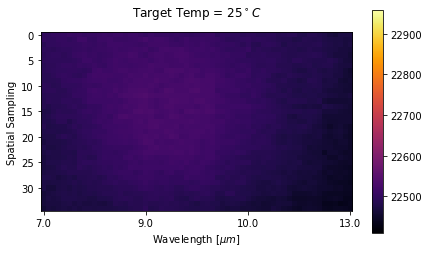

In [80]:
cmin = np.min(list(df['ims2'])); cmax=np.max(list(df['ims2']))

j = 0;
plt.matshow(df['ims2'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],waves[20],waves[30],waves[60]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$')
plt.clim(cmin,cmax)

In [86]:
#create sum column
df["totalrad"] = df['ims2']+df['ims1']
df["totalstd"] = (df['s2']**2+df['s1']**2)**0.5

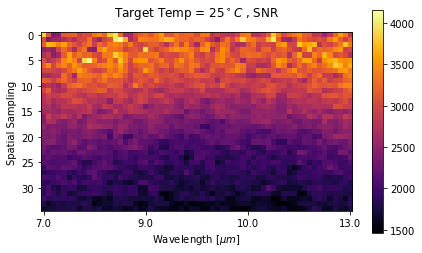

In [96]:
cmin = np.min(list(df['totalrad'])); cmax=np.max(list(df['totalrad']))

j = 0;
plt.matshow(df['totalrad'][j]/df['totalstd'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],waves[20],waves[30],waves[60]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$ , SNR ')
#plt.clim(cmin,cmax)
plt.show()

In [163]:
x =20;
y = 50;
data = np.zeros(len(df))
for i in range(len(df)):
    data[i] = list(df['totalrad'][i])[x][y]

In [190]:
# pixel fit 
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x**2 + B

def finv(y,A,B):
    return ((y-B)/A)**0.5

#fit over wavelengths with lowest noise
popt, pcov = curve_fit(f, temps, data) # your data x, y to fit

C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


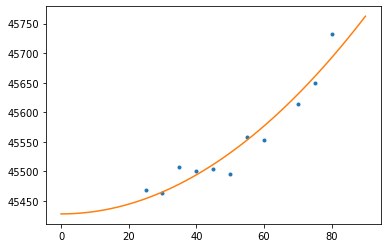

In [166]:
xf = np.linspace(0,90)
yf = f(xf,popt[0],popt[1])

plt.plot(temps,data,'.')
plt.plot(xf,yf,'-')
plt.show()

In [186]:
As= np.zeros([35,len(waves)])
Bs= np.zeros([35,len(waves)])
for w in range(len(waves)):
    for s in range(35):
        data = np.zeros(len(df))
        for i in range(len(df)):
            data[i] = list(df['totalrad'][i])[s][w]
        popt, pcov = curve_fit(f, temps, data) # your data x, y to fit
        As[s][w] = popt[0]
        Bs[s][w] = popt[1]

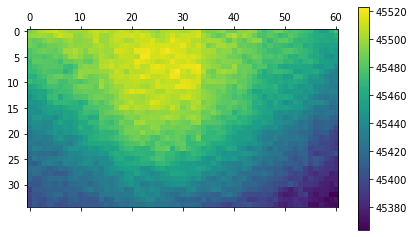

In [187]:
plt.matshow(Bs)
plt.colorbar()

In [228]:
j=8
#attempt retrival
Ts= np.zeros([35,len(waves)])
for w in range(len(waves)):
    for s in range(35):
        data= list(df['totalrad'][j])[s][w]
        A= As[s][w]
        B = Bs[s][w]
        t = finv(data,A,B)
        Ts[s][w] = t

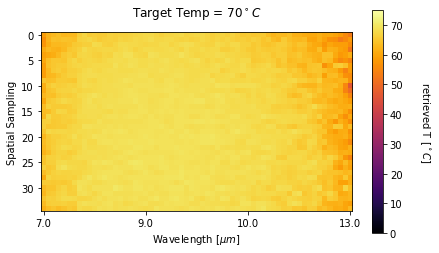

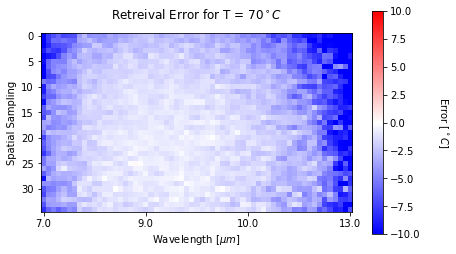

In [233]:

plt.matshow(Ts,cmap = 'inferno' )
cbar = plt.colorbar()
cbar.set_label('retrieved T [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],waves[20],waves[30],waves[60]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$')
plt.clim(0,temps[j]+5)
plt.show()

plt.matshow(Ts-temps[j],cmap = 'bwr' )
cbar = plt.colorbar()
cbar.set_label('Error [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],waves[20],waves[30],waves[60]])
plt.title('Retreival Error for T = ' + str(temps[j])+ '$^\circ C$')
plt.clim(-10,10)
plt.show()

In [234]:
#writetohdf5

#choose filepath to desired data
save_path =  "C://Users//khart//Documents//IRCSP2_data//calibration_files//"
name =  "LUT" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/A',  data=As)
hf.create_dataset('/B',  data= Bs)
hf.close()